In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
apdf = pd.read_pickle("0smallListings.pkl")

# Note wierdness in following cell per comment below...

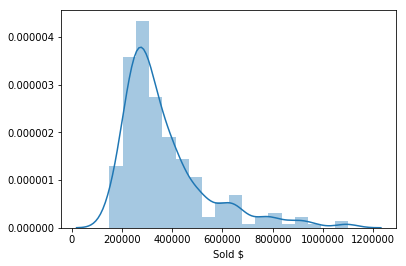

In [3]:
# Plot Histogram
#
# WIERD: it does not render teh plot the first time you execute the cell. WHY???
# 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#sns.distplot(apdf['Sold $'] , fit=norm);
sns.distplot(apdf['Sold $'], label = 'Sale Price Distribution');
# plt.ylabel('Frequency')
# not needed
plt.savefig('report\SalePriceDistribution.png')

In [4]:
# Summarize Categorical Data
print(apdf.select_dtypes(include=['object']).columns)
lencatdata = len(apdf.select_dtypes(include=['object']).columns)
print(lencatdata)

Index(['MLS', 'Address', 'City', 'Zip', 'List $', 'Sold Date', 'SP%LP',
       'CDOM'],
      dtype='object')
8


In [5]:
# Summarize Numberical Data
print(apdf.select_dtypes(include=['int32','int64','float64']).columns)
lennumdata = len(apdf.select_dtypes(include=['int32','int64','float64']).columns)
print(lennumdata)

Index(['Beds', '#Bath', '#HlfBath', 'Gar', 'TCP', 'YB', 'Pool', 'SF', '$/SF',
       'Acres', 'Sold $'],
      dtype='object')
11


In [6]:
print(f'Categorical Data Items: {lencatdata}; Numerical Data Items: {lennumdata}, Total Data Items: {lencatdata+lennumdata}')

Categorical Data Items: 8; Numerical Data Items: 11, Total Data Items: 19


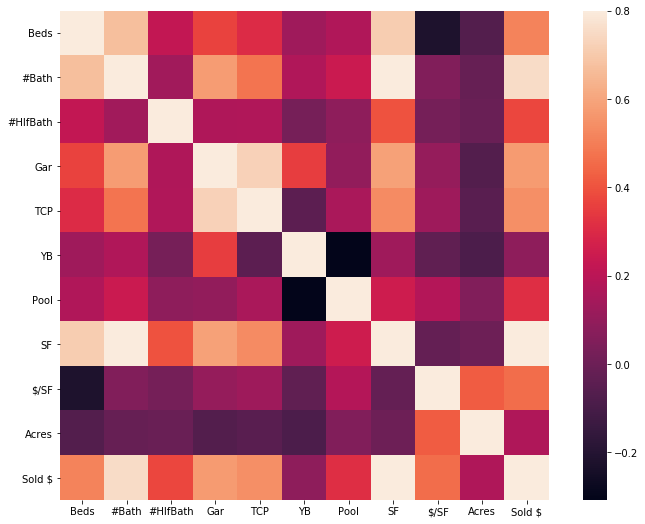

In [8]:
# Correlation Matrix Heatmap
corrmat = apdf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# sns.heatmap(corrmat, vmax=.8, square=True, center=1); # color = blue
plt.savefig('report\FeaturesHeatMap.png')
# Use this for the -hot colors
# import seaborn as sns
# sns.heatmap(data.corr())

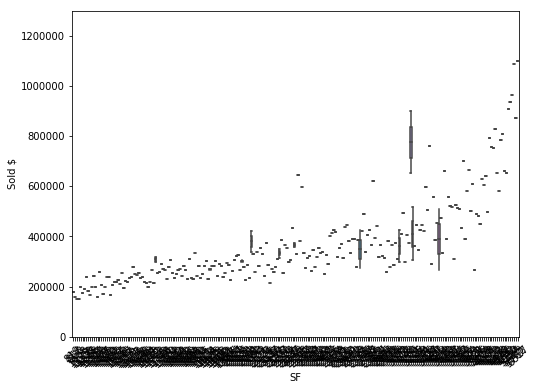

In [9]:
# create bins: group by year built
feature = 'SF'
data = pd.concat([apdf['Sold $'], apdf[feature]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=feature, y="Sold $", data=data)
fig.axis(ymin=0, ymax=1300000);
plt.xticks(rotation=45);
plt.savefig('report\sf_vs_sale_price.png')

# Plot above needs to be redone using bins -- there is too much data

In [18]:
apdf['SF'].describe()

count     249.000000
mean     2546.967871
std       977.232530
min       819.000000
25%      1880.000000
50%      2253.000000
75%      3190.000000
max      6817.000000
Name: SF, dtype: float64

In [19]:
# sfbins = apdf.cut('sf', 20, include_lowest=True, retbins=True)
# SAMPLE: test['range'] = pd.cut(test.days, [0,30,60], include_lowest=True)
# sfbins = pd.cut(apdf['SF'], 20, include_lowest=True, retbins=True)
#sfbins = pd.cut(apdf['SF'], 50, include_lowest=True, retbins=True)
sfbins = pd.cut(apdf['SF'], 50, include_lowest=True)
sfbins

0       (813.001, 938.96]
1       (938.96, 1058.92]
2       (1298.84, 1418.8]
3       (813.001, 938.96]
4       (1418.8, 1538.76]
5      (1178.88, 1298.84]
6       (1298.84, 1418.8]
7      (1058.92, 1178.88]
8       (813.001, 938.96]
9      (1178.88, 1298.84]
10     (1178.88, 1298.84]
11     (1538.76, 1658.72]
12      (1298.84, 1418.8]
13      (1298.84, 1418.8]
14     (1658.72, 1778.68]
15     (1058.92, 1178.88]
16      (1298.84, 1418.8]
17      (1298.84, 1418.8]
18      (1418.8, 1538.76]
19     (1538.76, 1658.72]
20     (1538.76, 1658.72]
21      (2018.6, 2138.56]
22     (1658.72, 1778.68]
23     (1538.76, 1658.72]
24     (1658.72, 1778.68]
25      (1418.8, 1538.76]
26      (1418.8, 1538.76]
27     (1538.76, 1658.72]
28     (1538.76, 1658.72]
29      (1418.8, 1538.76]
              ...        
219     (3818.0, 3937.96]
220    (2258.52, 2378.48]
221    (3338.16, 3458.12]
222    (3937.96, 4057.92]
223     (3818.0, 3937.96]
224    (2738.36, 2858.32]
225    (3937.96, 4057.92]
226    (3937

In [20]:
pd.__version__ # Why does .cut work???? My pd.version is way low !?!?!?

'0.24.2'

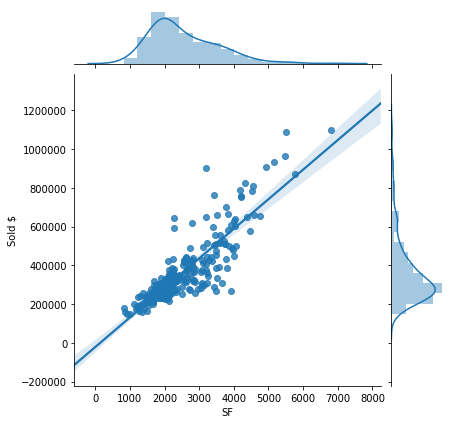

In [21]:
# Living Area vs Sale Price
sns.jointplot(x=apdf['SF'], y=apdf['Sold $'], kind='reg')
plt.savefig('report\lvgarea_vs_saleprice.png')

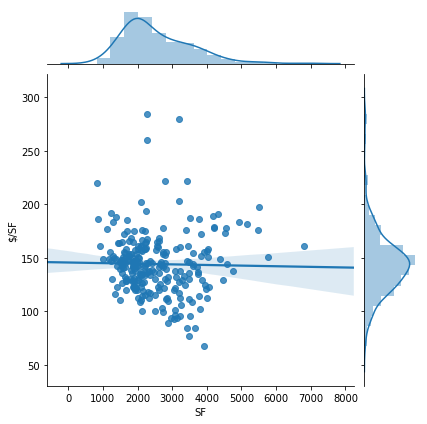

In [22]:
# A plot I always wanted to see: Price per SF vs SF
sns.jointplot(x=apdf['SF'], y=apdf['$/SF'], kind='reg')
plt.savefig('report\pricepersf_vs_sf.png')

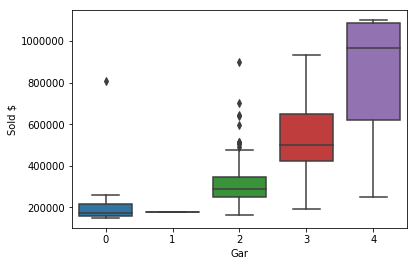

In [23]:
# Garage Area vs Sale Price
#'MLS','Address','City','Zip','Beds','#Bath','#HlfBath','Gar','CvPk','TCP','YB','Pool','SF','$/SF','Acres','List $','Sold $','Sold Date','SP%LP','CDOM'
sns.boxplot(x=apdf['Gar'], y=apdf['Sold $'])
plt.savefig('report\gar_vs_sp_boxplot.png')

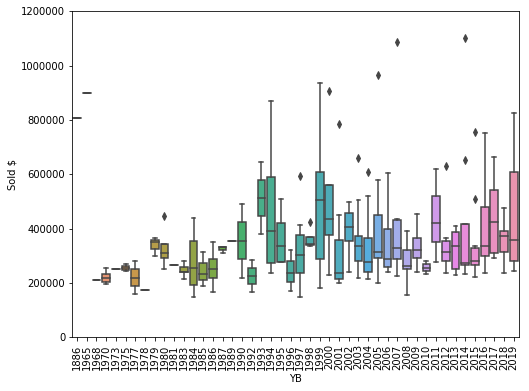

In [24]:
# Now lets do year built, resue box plot from the Sold$ vs SF
feature = 'YB'
data = pd.concat([apdf['Sold $'], apdf[feature]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=feature, y="Sold $", data=data)
fig.axis(ymin=0, ymax=1200000);
plt.xticks(rotation=90);
# 2FIX: Year Built legibility
plt.savefig('report\yb_vs_sp.png')

In [16]:
apdf['YB'].describe()

count     249.000000
mean     2002.248996
std        15.109088
min      1886.000000
25%      1996.000000
50%      2004.000000
75%      2014.000000
max      2019.000000
Name: YB, dtype: float64

In [38]:
# EKim uses label encoding for categorical data
# How is one-hot better? Is it?
# With minimal understanding, it seems hard to see why label encoding can be of help at all
# if there is no necessary relationship between the unique categorical data items
# Harware analogy: 8 to 3 decoder vs one hot state machine
# 
# Certainty: We add accuracy to the model by adding geographical location data features
# This is called "local market factors"
# It would be interestign to see HOW MUCH geographical location affects accuracy
#

#
# NEXT Set up feature/data & class/target...
#
# DATA COLUMN    TYPE       DROP
# -----------   ------      ----
# MLS           object      ****
# Address       object      ****
# City          object      ****
# Zip           object      ****

# Beds           int32
# #Bath          int32
# #HlfBath       int32
# Gar            int32
# TCP            int32
# YB             int32
# Pool           int64
# SF             int32

# $/SF         float64      ****

# Acres        float64

# List $        object      ****

# Sold $         int32

# Sold Date     object      ****
# SP%LP         object      ****
# CDOM          object      ****
# dtype: object